In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [3]:
from urllib.request import urlretrieve

In [4]:
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [5]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _)=\
    pickle.load(f, encoding='latin-1')

In [6]:
x_train.shape

(50000, 784)

In [7]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [8]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [9]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

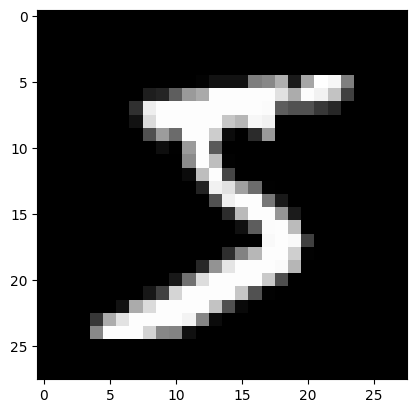

In [10]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

In [11]:
from itertools import islice

In [12]:
it = iter(vals)
islice(it, 5)

In [13]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [14]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [15]:
list(islice(it, 5))

[]

In [16]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

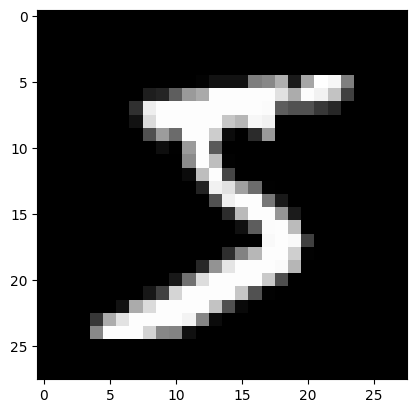

In [17]:
plt.imshow(img);

In [18]:
img[20][15]

0.98828125

In [19]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [20]:
m = Matrix(img)
m[20,15]

0.98828125

In [21]:
import torch
from torch import tensor

In [22]:
tensor([1,2,3])

tensor([1, 2, 3])

In [23]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.shape

torch.Size([50000, 784])

In [24]:
imgs = x_train.reshape((-1,28,28))
imgs.shape

torch.Size([50000, 28, 28])

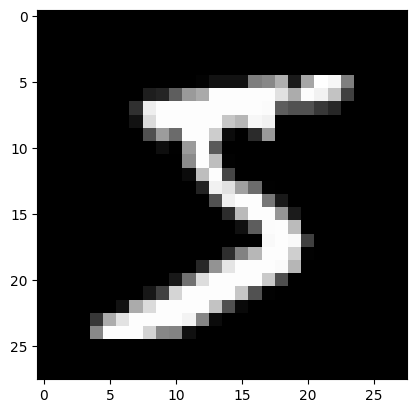

In [25]:
plt.imshow(imgs[0]);

In [26]:
imgs[0,20,15]

tensor(0.9883)

In [27]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [28]:
min(y_train),max(y_train)

(tensor(0), tensor(9))

In [29]:
y_train

tensor([5, 0, 4,  ..., 8, 4, 8])

In [30]:
# Generate a 3x3 tensor with random numbers from a standard normal distribution
random_tensor = torch.randn(3, 3)

# Output
print(random_tensor)

tensor([[-1.0688, -0.2383,  1.0288],
        [-0.2786,  1.1420,  0.7817],
        [ 0.5942, -1.1911,  0.5004]])


In [31]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

In [32]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [33]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [34]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [35]:
rand(),rand(),rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

In [36]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.9559050644103264
In child: 0.9559050644103264


In [37]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.3237])
In child: tensor([0.3237])


In [38]:
from random import random

In [39]:
if os.fork(): print(f'In parent: {random()}')
else:
    print(f'In child: {random()}')
    os._exit(os.EX_OK)

In parent: 0.9446951392122956
In child: 0.5387147073050219


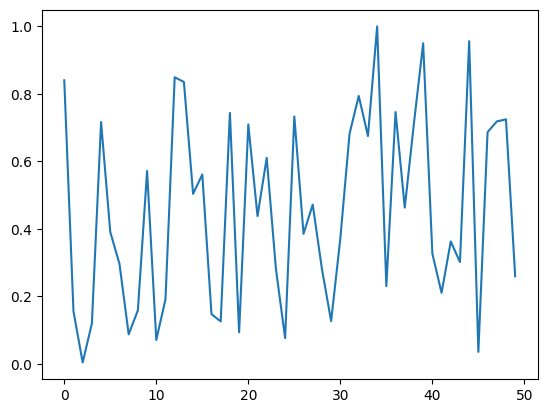

In [40]:
plt.plot([rand() for _ in range(50)]);

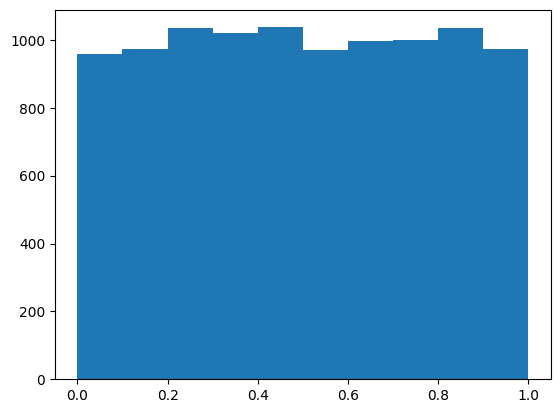

In [41]:
plt.hist([rand() for _ in range(10000)]);

In [42]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

7.63 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
%timeit -n 10 torch.randn(784,10)

84.7 µs ± 38.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [45]:
m1 = x_valid[:5]
m2 = weights

In [46]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [47]:
ar,ac = m1.shape # n_rows * n_cols
br,bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [48]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [49]:
for i in range(ar):         # 5
    for j in range(bc):     # 10
        for k in range(ac): # 784
            t1[i,j] += m1[i,k] * m2[k,j]

In [50]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [51]:
t1.shape

torch.Size([5, 10])

In [52]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [53]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [54]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [55]:
%time _=matmul(m1, m2)

CPU times: user 937 ms, sys: 1.64 ms, total: 939 ms
Wall time: 938 ms


In [56]:
ar*bc*ac

39200

In [57]:
from numba import njit

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [58]:
@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [59]:
from numpy import array

In [60]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 667 ms, sys: 287 ms, total: 953 ms
Wall time: 761 ms


20.0

In [61]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot(a[i,:], b[:,j])
    return c

In [62]:
m1a,m2a = array(m1),array(m2)

In [63]:
from fastcore.test import *

In [64]:
test_close(t1,matmul(m1a, m2a))

In [65]:
%timeit -n 50 matmul(m1a,m2a)

521 µs ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [66]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [67]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [68]:
test_close(t1,matmul(m1, m2))

In [69]:
%timeit -n 50 _=matmul(m1, m2)

1.48 ms ± 64.3 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [70]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = torch.dot(a[i,:], b[:,j])
    return c

In [71]:
test_close(t1,matmul(m1, m2))

In [72]:
%timeit -n 50 _=matmul(m1, m2)

1.06 ms ± 23 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [73]:
a = tensor([10., 6, -4])

In [74]:
a>0

tensor([ True,  True, False])

In [75]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [76]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

In [77]:
c=tensor([10,20,30]);c

tensor([10, 20, 30])

In [78]:
c.shape,m.shape

(torch.Size([3]), torch.Size([3, 3]))

In [79]:
m+c,c+m

(tensor([[11., 22., 33.],
         [14., 25., 36.],
         [17., 28., 39.]]),
 tensor([[11., 22., 33.],
         [14., 25., 36.],
         [17., 28., 39.]]))

In [80]:
t=c.expand_as(m);t

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

In [81]:
m+t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [82]:
t.storage()

/tmp/ipykernel_42/1911556638.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  t.storage()
/opt/conda/lib/python3.10/site-packages/IPython/lib/pretty.py:778: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  output = repr(obj)
/opt/conda/lib/python3.10/site-packages/torch/storage.py:645: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use

 10
 20
 30
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [83]:
t.stride(),t.shape

((0, 1), torch.Size([3, 3]))

In [84]:
c,c.shape

(tensor([10, 20, 30]), torch.Size([3]))

In [85]:
c.unsqueeze(0),c.unsqueeze(0).shape,c[None,:],c[None]

(tensor([[10, 20, 30]]),
 torch.Size([1, 3]),
 tensor([[10, 20, 30]]),
 tensor([[10, 20, 30]]))

In [86]:
c.unsqueeze(1),c.unsqueeze(1).shape,c[:,None],c[...,None] #min 3 ... required to work

(tensor([[10],
         [20],
         [30]]),
 torch.Size([3, 1]),
 tensor([[10],
         [20],
         [30]]),
 tensor([[10],
         [20],
         [30]]))

In [87]:
c[None,:] * c[:,None]

tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]])

In [88]:
c[None,:] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [89]:
m1,m2

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[-1.53, -0.75, -0.65,  ..., -1.61, -0.71,  0.30],
         [-0.78, -0.25, -0.22,  ..., -1.16,  0.70,  0.20],
         [ 0.87,  0.24, -0.66,  ..., -1.45,  0.06, -0.62],
         ...,
         [ 0.51,  0.47, -0.26,  ...,  0.65,  0.43, -1.29],
         [ 0.52,  1.03,  0.81,  ..., -0.10,  2.26, -0.28],
         [-1.49,  0.39, -0.55,  ..., -0.19, -0.51,  0.54]]))

In [90]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [91]:
digit = m1[0]
digit.shape,m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [92]:
digit[:,None].shape

torch.Size([784, 1])

In [93]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [94]:
(digit[:,None]*m2).shape

torch.Size([784, 10])

In [95]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:] * b[:,j]).sum()      # previous version
        c[i]   = (a[i,:,None] * b).sum(dim=0) # broadcast version
    return c

In [96]:
test_close(t1,matmul(m1, m2))

In [97]:
%timeit -n 50 _=matmul(m1, m2)

185 µs ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [98]:
tr = matmul(x_train, weights)
tr

tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

In [99]:
tr.shape

torch.Size([50000, 10])

In [100]:
%time _=matmul(x_train, weights)

CPU times: user 1.68 s, sys: 929 µs, total: 1.68 s
Wall time: 1.67 s


In [101]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [102]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [103]:
torch.einsum('ik,kj->ij', m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [104]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [105]:
test_close(tr, matmul(x_train, weights), eps=1e-3)

In [106]:
%timeit -n 5 _=matmul(x_train, weights)

11 ms ± 465 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [107]:
test_close(tr, x_train@weights, eps=1e-3)

In [108]:
%timeit -n 5 _=torch.matmul(x_train, weights)

10.8 ms ± 457 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [109]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [110]:
res = torch.zeros(ar, bc)
matmul((0,0), m1, m2, res)
res

tensor([[-10.94,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]])

In [111]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y): kernel((i,j), *args, **kwargs)

In [112]:
res = torch.zeros(ar, bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [113]:
from numba import cuda

In [114]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [115]:
@cuda.jit
def matmul(a,b,c):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [116]:
r = np.zeros(tr.shape)
m1g,m2g,rg = map(cuda.to_device, (x_train,weights,r))

In [117]:
r.shape

(50000, 10)

In [118]:
TPB = 16
rr,rc = r.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
blockspergrid

(3125, 1)

In [119]:
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()
test_close(tr, r, eps=1e-3)

In [120]:
%%timeit -n 10
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()

10.5 ms ± 3.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [121]:
m1c,m2c = x_train.cuda(),weights.cuda()

In [122]:
r=(m1c@m2c).cpu()

In [124]:
%timeit -n 10 r=(m1c@m2c).cpu()

1.97 ms ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
